# Computing Examples

In [1]:
set.seed(32)

In the last segment, we saw $\theta \sim Gamma(2, \frac{1}{3})$

In [2]:
m = 100
a = 2
b = 1/3

In [3]:
m

[1] 100

In [4]:
a

[1] 2

In [5]:
b

[1] 0.3333333

To simulate m independent samples from this $Gamma$ distribution, we will use $\verb|rgamma|$ function

In [6]:
theta = rgamma(n = m, shape = a, rate = b)

In [8]:
head(theta)

[1] 4.553954 8.280642 1.515590 9.160268 3.507859 5.606974

In [9]:
tail(theta)

[1] 2.432403 7.148443 2.715706 2.763691 5.413677 5.865641

Let's plot the histogram of the $\theta$ values and compare it to the true $Gamma$ distribution

To plot the true $Gamma$ distribution, we use $\verb|dgamma|$ function

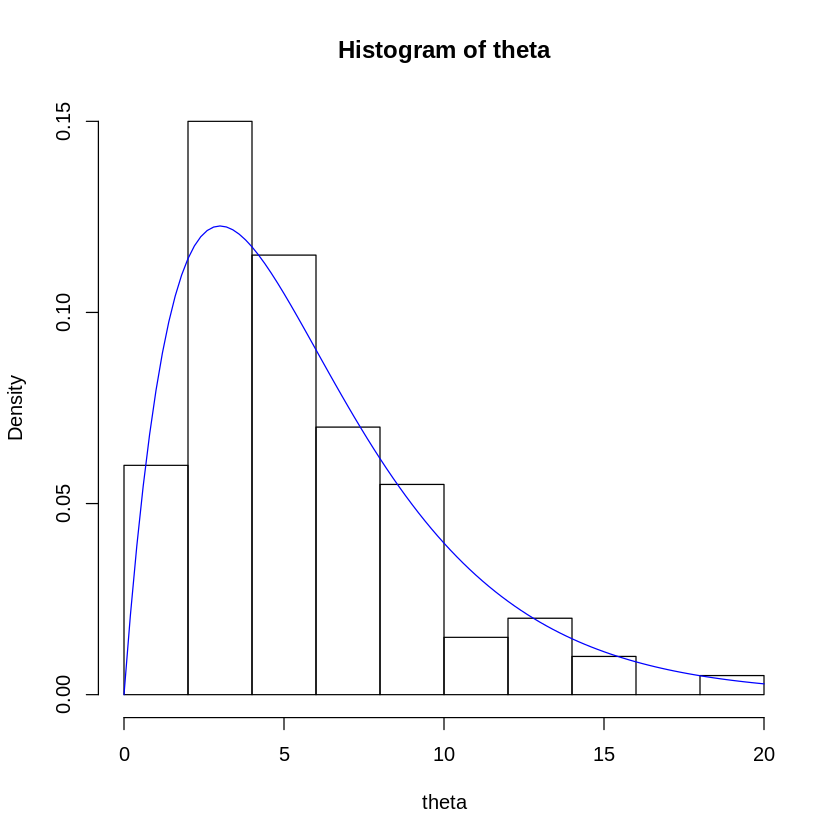

In [12]:
hist(theta, freq = FALSE) #freq = FALSE as we want probabilities rather than count
curve(dgamma(x = x, shape = a, rate = b), col = 'blue', add = TRUE)

Now, we can do Monte Carlo Estimation over these simulated values to find Expected value of $\theta$

In [13]:
sum(theta) / m

[1] 5.514068

OR

In [14]:
mean(theta)

[1] 5.514068

Wherea as True Expectation = a/b

In [15]:
a/b

[1] 6

To improve the Estimation, we can increase $m$

In [16]:
m = 10000

In [17]:
theta = rgamma(n = m, shape = a, rate = b)

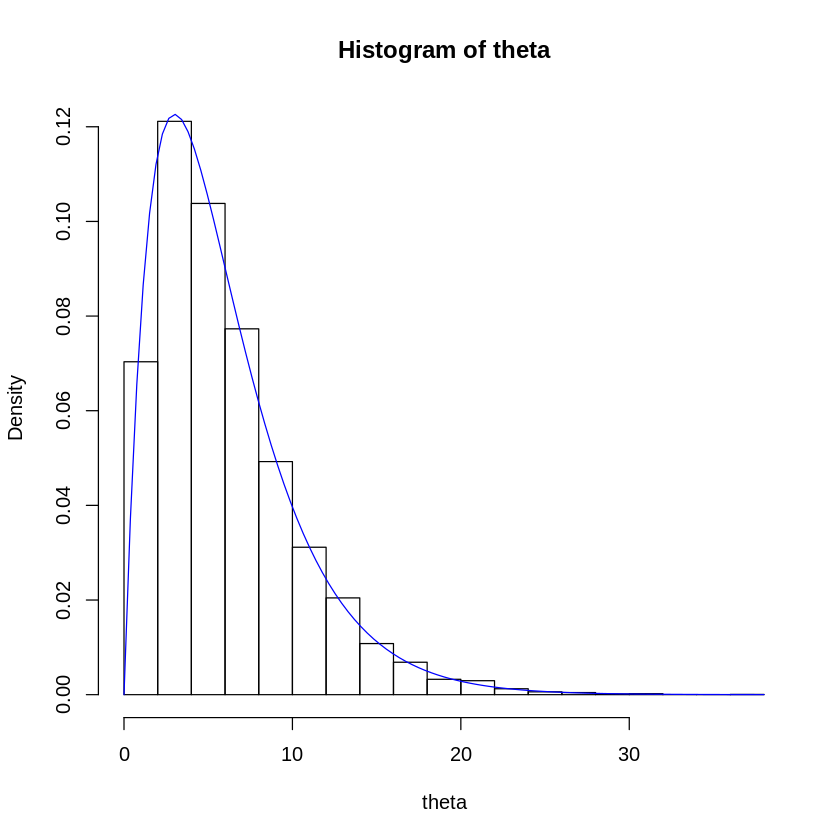

In [18]:
hist(theta, freq = FALSE) #freq = FALSE as we want probabilities rather than count
curve(dgamma(x = x, shape = a, rate = b), col = 'blue', add = TRUE)

In [19]:
mean(theta)

[1] 6.023273

Now, we can do Monte Carlo Estimation for variance of $\theta$

In [24]:
var(theta)

[1] 18.04318

True Variance = $\frac{a}{b^2}$

In [25]:
a/b^2

[1] 18

To find that $Pr[0 \lt \theta \lt 5]$

In [27]:
mean(theta < 5)

[1] 0.497

The true value of this probability can be found via $\verb|pgamma|$ function

In [28]:
pgamma(q = 5, shape = a, rate = b)

[1] 0.4963317

# Simulation from a Hierarchical Model

1. Simulate $\phi_i$ from $Beta(2,2)$
2. Simulate $y_i$ from $Bin(10, \phi_i)$

In [29]:
m = 1e5

In [30]:
y = numeric(m)

In [32]:
head(y)

[1] 0 0 0 0 0 0

In [33]:
phi = numeric(m)

In [34]:
for (i in 1:m){
    
    phi[i] = rbeta(1,shape1 = 2, shape2 = 2)
    
    y[i] = rbinom(n = 1,size = 10, prob = phi[i])
    
}

Same simulation but with Vectorized Code

In [35]:
phi_vec = rbeta(n = m, shape1 = 2, shape2 = 2)
y_vec = rbinom(n = m, size = 10, prob = phi_vec)

Distribution of $y$

We can treat the y we have as the marginalized distribution, which will not be Binomial but Beta-Binomial Distribution as since condtional on $\phi$, $y$ follows a Binomial Distribution but unconditionally, marginal of $y$ is not binomial.

In [39]:
table(y_vec)

y_vec
    0     1     2     3     4     5     6     7     8     9    10 
 3857  7032  9360 11119 12320 12756 12233 11036  9300  7081  3906 

To get approximation of marginal probabilities for y, we divide it by number of samples m

In [41]:
table(y_vec) / m

y_vec
      0       1       2       3       4       5       6       7       8       9 
0.03857 0.07032 0.09360 0.11119 0.12320 0.12756 0.12233 0.11036 0.09300 0.07081 
     10 
0.03906 

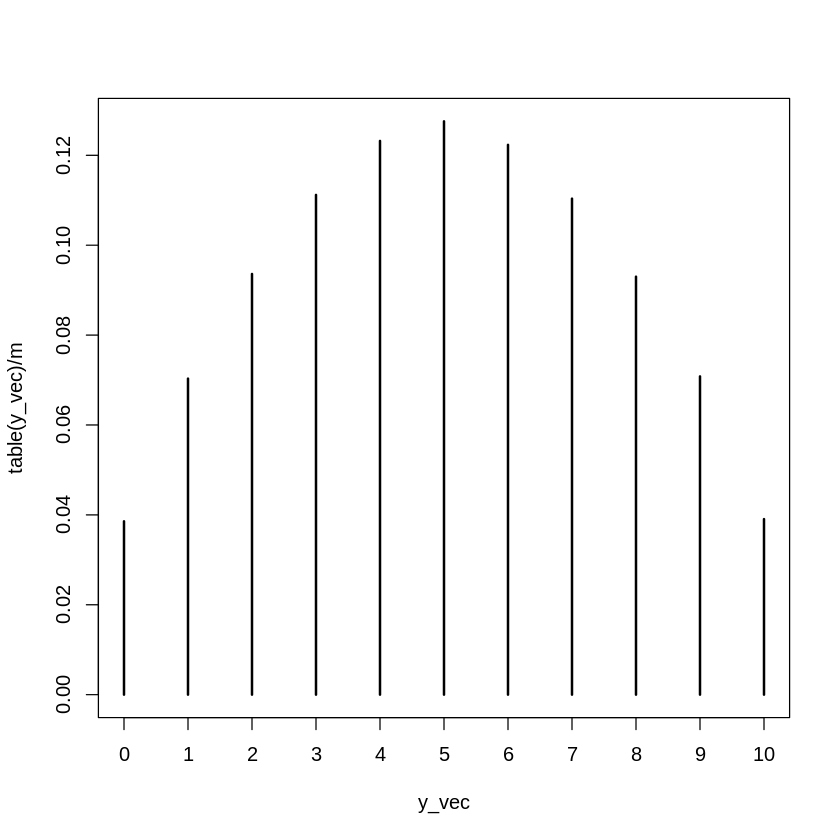

In [42]:
plot(table(y_vec) / m)

The above distribution is not Binomial.

Approximated Marginal Expected Value of y

In [44]:
mean(y_vec)

[1] 5.00008